In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as se
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
#from sklearn import confusion_matrix
# from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print(f'number of rows {df.shape[0]} and number of columns {df.shape[1]}')

number of rows 768 and number of columns 9


In [ ]:
def cal_median(df,target,var):
  temp = df[df[var].notnull()]
  temp = temp[[var,target]].groupby([target])[[var]].median().reset_index()
  return temp

In [ ]:
def median_imputation(df,target,var,var_0,var_1):
  for i in range(len(df)):
    if df.loc[i,target] == 0 and df.loc[i,var] ==0:
      df.loc[i,var] = var_0

    if df.loc[i,target] == 1 and df.loc[i,var] ==0:
      df.loc[i,var] =var_1

In [ ]:
d = cal_median(df,"Outcome","Insulin")
d

,Outcome,Insulin
0,0,39.0
1,1,0.0


In [ ]:
median_imputation(df,'Outcome','Insulin',d.loc[0,'Insulin'],d.loc[1,'Insulin'])


In [ ]:
d = cal_median(df,'Outcome','Glucose')
d

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [ ]:
median_imputation(df,'Outcome','Glucose', d.loc[0,'Glucose'],d.loc[1,'Glucose'])


In [ ]:
d = cal_median(df,'Outcome','SkinThickness')
d

,Outcome,SkinThickness
0,0,21.0
1,1,27.0


In [ ]:
median_imputation(df,'Outcome','SkinThickness', d.loc[0,'SkinThickness'],d.loc[1,'SkinThickness'])

In [ ]:
d = cal_median(df,'Outcome','BloodPressure')
d

,Outcome,BloodPressure
0,0,70.0
1,1,74.0


In [ ]:
median_imputation(df,'Outcome','BloodPressure', d.loc[0,'BloodPressure'],d.loc[1,'BloodPressure'])

In [ ]:
d = cal_median(df,'Outcome','BMI')
d

,Outcome,BMI
0,0,30.05
1,1,34.25


In [ ]:
median_imputation(df,'Outcome','BMI', d.loc[0,'BMI'],d.loc[1,'BMI'])

In [ ]:
import plotly.express as exp
import plotly.io as pio

def plot_data(df,varx,vary,target):
  pio.templates.default = 'simple_white'
  exp.defaults.template = 'ggplot2'
  exp.defaults.color_continuous_scale = exp.colors.sequential.Blackbody
  exp.defaults.width = 800
  exp.defaults.height = 600
  fig = exp.scatter(df,x=varx,y=vary,color=target)
  fig.show()

In [ ]:
plot_data(df,'Glucose','Age','Outcome')

the above scatter plot showa that if age<=30  and glucose<=120 then patient has no symptom of diabetes . we can consider it as Rule-N1

In [ ]:
df.loc[:,'N1'] = 1
df.loc[(df['Age']<=30) & (df['Glucose']<=120),'N1'] = 0
df.loc[(df['Age']>30) & (df['Age']<48) & (df['Glucose']<=88),'N1'] = 0
df.loc[(df['Age']>=63) & (df['Glucose']<=142),'N1'] = 0

In [ ]:
df.loc[:,'N2'] = 1
df.loc[(df['BMI']<=30),'N2']=0

In [ ]:
plot_data(df,'Pregnancies','Age','Outcome')

In [ ]:
df.loc[:,'N3'] = 1
df.loc[(df['Age']<=27) & (df['Pregnancies']<=6),'N3'] = 0
df.loc[(df['Age']>=60) & (df['Pregnancies']>7.5),'N3'] = 0

In [ ]:
plot_data(df,'Glucose','BloodPressure','Outcome')

In [ ]:
df.loc[:,'N4'] = 1
df.loc[(df['Glucose']<=105) & (df['BloodPressure']<=80),'N4'] = 0
df.loc[(df['Glucose']<=105) & (df['BloodPressure']>83),'N4'] = 0

In [ ]:
df.loc[:,'N5'] = 1
df.loc[(df['SkinThickness']<=20),'N5']=0


In [ ]:
plot_data(df,'SkinThickness','BMI','Outcome')

In [ ]:
df.loc[:,'N6'] = 1
df.loc[(df['BMI']<30) & (df['SkinThickness']<=20),'N6'] = 0
df.loc[(df['BMI']>33) & (df['SkinThickness']<=20),'N6'] = 0

In [ ]:
plot_data(df,'Glucose','BMI','Outcome')

In [ ]:
df.loc[:,'N7'] = 1
df.loc[(df['Glucose']<=105) & (df['BMI']<=30),'N7'] = 0
df.loc[(df['Glucose']<=105) & (df['BMI']>=40),'N7'] = 0

In [ ]:
df.loc[:,'N9'] = 1
df.loc[(df['Insulin']<200),'N9']=0

In [ ]:
df.loc[:,'N10'] = 1
df.loc[(df['BloodPressure']<80),'N10']=0

In [ ]:
df.loc[:,'N11'] = 1
df.loc[(df['Pregnancies']<4) & (df['Pregnancies']!=0), 'N11']=0

In [ ]:
df["N0"] = df['BMI'] * df['SkinThickness']
df["N8"] = df['Pregnancies'] / df['Age']
df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']
df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']


In [ ]:
df.loc[:, 'N15']=1
df.loc[(df['N0']<1034), 'N15']=0

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,N1,...,N6,N7,N9,N10,N11,N0,N8,N13,N12,N15
0,6,148,72,35,0,33.6,0.627,50,1,1,...,1,1,0,0,1,1176.0,0.120000,236.044657,31.350,1
1,1,85,66,29,39,26.6,0.351,31,0,0,...,1,0,0,0,0,771.4,0.032258,242.165242,10.881,0
2,8,183,64,27,0,23.3,0.672,32,1,1,...,1,1,0,0,1,629.1,0.250000,272.321429,21.504,0
3,1,89,66,23,94,28.1,0.167,21,0,0,...,1,0,0,0,0,646.3,0.047619,532.934132,3.507,0
4,0,137,40,35,168,43.1,2.288,33,1,1,...,1,1,0,0,1,1508.5,0.000000,59.877622,75.504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,...,1,1,0,0,1,1579.2,0.158730,590.643275,10.773,1
764,2,122,70,27,39,36.8,0.340,27,0,1,...,1,1,0,0,0,993.6,0.074074,358.823529,9.180,0
765,5,121,72,23,112,26.2,0.245,30,0,1,...,1,1,0,0,1,602.6,0.166667,493.877551,7.350,0
766,1,126,60,27,0,30.1,0.349,47,1,1,...,1,1,0,0,0,812.7,0.021277,361.031519,16.403,0


In [ ]:
y=pd.DataFrame(df['Outcome'])
x=df.drop('Outcome', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in y.columns:
  y[col]= encoder.fit_transform(y[col])
  

In [ ]:
y = y['Outcome']

In [ ]:
cols = ['N1','N2','N3','N4','N5','N6','N7','N9','N10','N11']
for col in cols :
  x[col]=encoder.fit_transform(x[col])


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.2 , random_state=42)

bagging - decision Tree

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,
                            max_samples=100, bootstrap=True, n_jobs=-1, random_state=42,
                            oob_score=True)
bagging.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

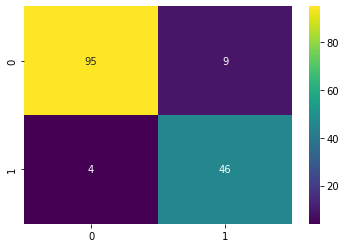

In [ ]:
confusion_matrix = confusion_matrix(bagging.predict(x_test), y_test)
se.heatmap(confusion_matrix, annot=True, fmt='0.2g', cmap='viridis')
plt.show()

In [ ]:
print(classification_report(bagging.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       104
           1       0.84      0.92      0.88        50

    accuracy                           0.92       154
   macro avg       0.90      0.92      0.91       154
weighted avg       0.92      0.92      0.92       154



voting classification - Logistic regreession , random forest and support vector machine 

In [ ]:
lr = LogisticRegression(max_iter=10000)
rf = RandomForestClassifier()
sv = SVC()

voting = VotingClassifier(estimators= [('lr',lr), ('rf',rf), ('SVC',sv)], voting= "hard")
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                             ('rf', RandomForestClassifier()), ('SVC', SVC())])

In [ ]:
confusion_matrix_voting = confusion_matrix(voting.predict(x_test),y_test)

se.heatmap(confusion_matrix_voting,annot=True,fmt='0.2g',cmap='viridis')
plt.show()

TypeError: ignored

In [ ]:
print(classification_report(voting.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       108
           1       0.67      0.80      0.73        46

    accuracy                           0.82       154
   macro avg       0.79      0.82      0.80       154
weighted avg       0.84      0.82      0.83       154



gaussian naive bayes

In [ ]:
gfc= GaussianNB()
gfc.fit(x_train,y_train)
#confusion_matrix_naive = confusion_matrix(gfc.predict(x_test),y_test)
#confusion_matrix_naive

GaussianNB()

In [ ]:
print(classification_report(y_test,gfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        99
           1       0.59      0.84      0.69        55

    accuracy                           0.73       154
   macro avg       0.74      0.76      0.73       154
weighted avg       0.78      0.73      0.74       154



svm  with gridsearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1,0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
std= StandardScaler()
x1 = std.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid, refit=True,verbose=3)

grid.fit(x_train , y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(classification_report(y_test, grid.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Randome forest classifier with gridsearchCV

In [ ]:
rf = RandomForestClassifier(n_jobs= -1, max_features= 'sqrt', n_estimators=100, oob_score=True)
#rf = RandomForestClassifier(n_jobs=-1, max_features= 'sqrt' , n_estimators=100, oob_score= = True)
param_grid = {
    'n_estimators' : [200, 700],
    'max_features' : ['auto', 'log2']

}

rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rfc.fit(x_train,y_train)
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        99
           1       0.83      0.80      0.81        55

    accuracy                           0.87       154
   macro avg       0.86      0.85      0.86       154
weighted avg       0.87      0.87      0.87       154



XGBoost classifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size= .2 , random_state=42)
xgbc = xgb.XGBClassifier(
    learning_rate=0.01,
    n_estimators= 2000,
    max_depth= 9,
    min_child_weight= 2,
    gamma= 0.4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread= -1,
    scale_pos_weight=1).fit(x_train,y_train)


In [ ]:
print(classification_report(y_test,xgbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        99
           1       0.87      0.84      0.85        55

    accuracy                           0.90       154
   macro avg       0.89      0.88      0.89       154
weighted avg       0.90      0.90      0.90       154



NGBoost classifier

In [ ]:
!pip install ngboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 7.8 MB/s 
     |████████████████████████████████| 68 kB 6.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=c55422f4fba24276cc44c6b5e66d3c193365a4630e48074331df12a86bf5769c
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.

In [ ]:
from ngboost import NGBClassifier
from ngboost.distns import Bernoulli 

In [ ]:
ngb = NGBClassifier(Dist=Bernoulli).fit(x_train,y_train)
print(classification_report(y_test,ngb.predict(x_test))) 

[iter 0] loss=0.6455 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.2137 val_loss=0.0000 scale=2.0000 norm=2.7007
[iter 200] loss=0.1898 val_loss=0.0000 scale=1.0000 norm=1.3271
[iter 300] loss=0.1816 val_loss=0.0000 scale=0.5000 norm=0.6605
[iter 400] loss=0.1771 val_loss=0.0000 scale=0.2500 norm=0.3294
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        99
           1       0.87      0.82      0.84        55

    accuracy                           0.89       154
   macro avg       0.88      0.87      0.88       154
weighted avg       0.89      0.89      0.89       154



LightGBM classifier 

In [ ]:
#from sklearn import metrics
import lightgbm as lgbm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV


random_state = 42

fit_params = { 'early_stopping_rounds': 100,
              'eval_metric' : 'auc',
              'eval_set' : [(x,y)],
              'eval_names' : ['valid'],
              'verbose' : 0,
              'categorical_feature' : 'auto'}

param_test ={'learnimg rate' : [0.01, 0.02 ,0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
             'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
             'num_leaves' : sp_randint(6, 50),
             'min_child_samples' : sp_randint(100,500),
             'min_child_weight' : [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4 ],
             'subsample' : sp_uniform(loc=0.2, scale=0.8),
             'max_depth' : [3,4,5,6,7],
             'colsample_bytree' : sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha' : [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda' : [0, 1e-1, 1, 5, 10, 20, 50, 100]}

n_iters = 300


lgbm_clf = lgbm.LGBMClassifier(random_state=random_state, silent=True, metrics= 'None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test,
    n_iter=n_iters,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(x,y, **fit_params)
opt_parameters= grid_search.best_params_
lgbm_clf = lgbm.LGBMClassifier(**opt_parameters)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [ ]:
model = lgbm_clf
model.fit(x_train,y_train)
  

LGBMClassifier(colsample_bytree=0.9909047193774008, learnimg rate=0.04,
               max_depth=3, min_child_samples=100, min_child_weight=10.0,
               n_estimators=800, num_leaves=45, reg_alpha=5, reg_lambda=50,
               subsample=0.24380931105762507)

In [ ]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        99
           1       0.85      0.91      0.88        55

    accuracy                           0.91       154
   macro avg       0.90      0.91      0.90       154
weighted avg       0.91      0.91      0.91       154



ADABoost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, base_estimator=rf,learning_rate=1).fit(x_train,y_train)

print(classification_report(y_test,abc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        99
           1       0.83      0.80      0.81        55

    accuracy                           0.87       154
   macro avg       0.86      0.85      0.86       154
weighted avg       0.87      0.87      0.87       154



weighted Average

In [ ]:
final_predict = 0.5*lgbm_clf.predict(x_test)+ 0.4*ngb.predict(x_test)+ 0.1*xgbc.predict(x_test)

for i in range(len(final_predict)):
    if final_predict[i] >= 0.5:
      final_predict[i]=1
    else:
      final_predict[i] = 0


print(classification_report(y_test, final_predict))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        99
           1       0.85      0.91      0.88        55

    accuracy                           0.91       154
   macro avg       0.90      0.91      0.90       154
weighted avg       0.91      0.91      0.91       154



stacking

In [ ]:
!pip install python-stack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 510 kB 7.1 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
     |████████████████████████████████| 271 kB 43.6 MB/s 
  Created wheel for python-stack: filename=python_stack-0.1.7.11-py3-none-any.whl size=8669 sha256=4fe995fdd5f9aa90b7c705a341edeb60669fdf658fa83a25ec9366af30750030
  Stored in directory: /root/.cache/pip/wheels/32/a5/b4/9bef0f5f6548c7bb1af165db75ff7b93697fc9dd65c0fa0e1e
  Created wheel for python-stack-cli: filename=python_stack_cli-0.2.15.5-py3-none-any.whl size=10164 sha256=fcab667316287f00509fe11e6678e4994c742b0f6ae7fe90b960a684bf9b50fb
  Stored in directory: /root/.cache/pip/wheels/c9/0a/c8/353d67b68644aee110303dd126861ad57cf8efda0e670f2041
  Created wheel for aiohttp: filename=aiohttp-1.1.6-cp37-cp37m-linux_x86_64.whl size=168482 sha256=9791d0696246ce1e0da31bda7286ad3f100db2ad82fd87549c2deec4bb6aa04e
  Stored in dir

In [ ]:
!pip install stacking

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stacking: filename=stacking-0.1.3-py2.py3-none-any.whl size=10660 sha256=af2208621bf91740fa2070abd9a0bc9c9dd2e6e8e8882f040e372b34a2a7a366
  Stored in directory: /root/.cache/pip/wheels/e3/16/58/59a1e1f329f366791afa2a1efdac94668e1d231d48f3674f00
Successfully built stacking


In [ ]:
!pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19877 sha256=2bdbcc854286fef7277ae4f59180316ac29a88429d006c1a88cc5b0cdba22b41
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [ ]:
from vecstack import stacking
#from vecstack from stacking
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from math import gamma
model = [AdaBoostClassifier(n_estimators=50, learning_rate=1),
         NGBClassifier(Dist=Bernoulli),
         xgb.XGBClassifier(learning_rate=0.01, n_estimators=2000,
                           max_depth=9,
                           gamma=0.4,
                           subsample=0.8,
                           colsample_bytree=0.8,
                           objective='binary:logistic',
                           nthread= -1,
                           scale_pos_weight=1)]

level1_train,level1_test = stacking(model,x_train,y_train,x_test,
                                    regression=False,
                                    mode= 'oof_pred_bag',
                                    needs_proba=False,
                                    save_dir=None,
                                    metric=accuracy_score,
                                    n_folds=4,
                                    stratified=True,
                                    shuffle=True,
                                    random_state=0,
                                    verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [AdaBoostClassifier]
    fold  0:  [0.87012987]
    fold  1:  [0.87012987]
    fold  2:  [0.86274510]
    fold  3:  [0.89542484]
    ----
    MEAN:     [0.87460742] + [0.01239129]
    FULL:     [0.87459283]

model  1:     [NGBClassifier]
[iter 0] loss=0.6461 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.2081 val_loss=0.0000 scale=2.0000 norm=2.6597
[iter 200] loss=0.1887 val_loss=0.0000 scale=4.0000 norm=5.2510
[iter 300] loss=0.1824 val_loss=0.0000 scale=0.5000 norm=0.6535
[iter 400] loss=0.1796 val_loss=0.0000 scale=0.5000 norm=0.6520
    fold  0:  [0.88961039]
[iter 0] loss=0.6447 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.1970 val_loss=0.0000 scale=2.0000 norm=2.6224
[iter 200] loss=0.1739 val_loss=0.0000 scale=2.0000 norm=2.5789
[iter 300] loss=0.1659 val_loss=0.0000 scale=1.0000 norm=1.2817
[iter 400] loss=0.161

In [ ]:
model= xgb.XGBClassifier(learning_rate=0.1,n_estimators=2000,max_depth=3)
model.fit(level1_train,y_train)
predicted = model.predict(level1_test)
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       102
           1       0.84      0.88      0.86        52

    accuracy                           0.90       154
   macro avg       0.89      0.90      0.89       154
weighted avg       0.90      0.90      0.90       154

